[ 327.49922143 -150.30395515]


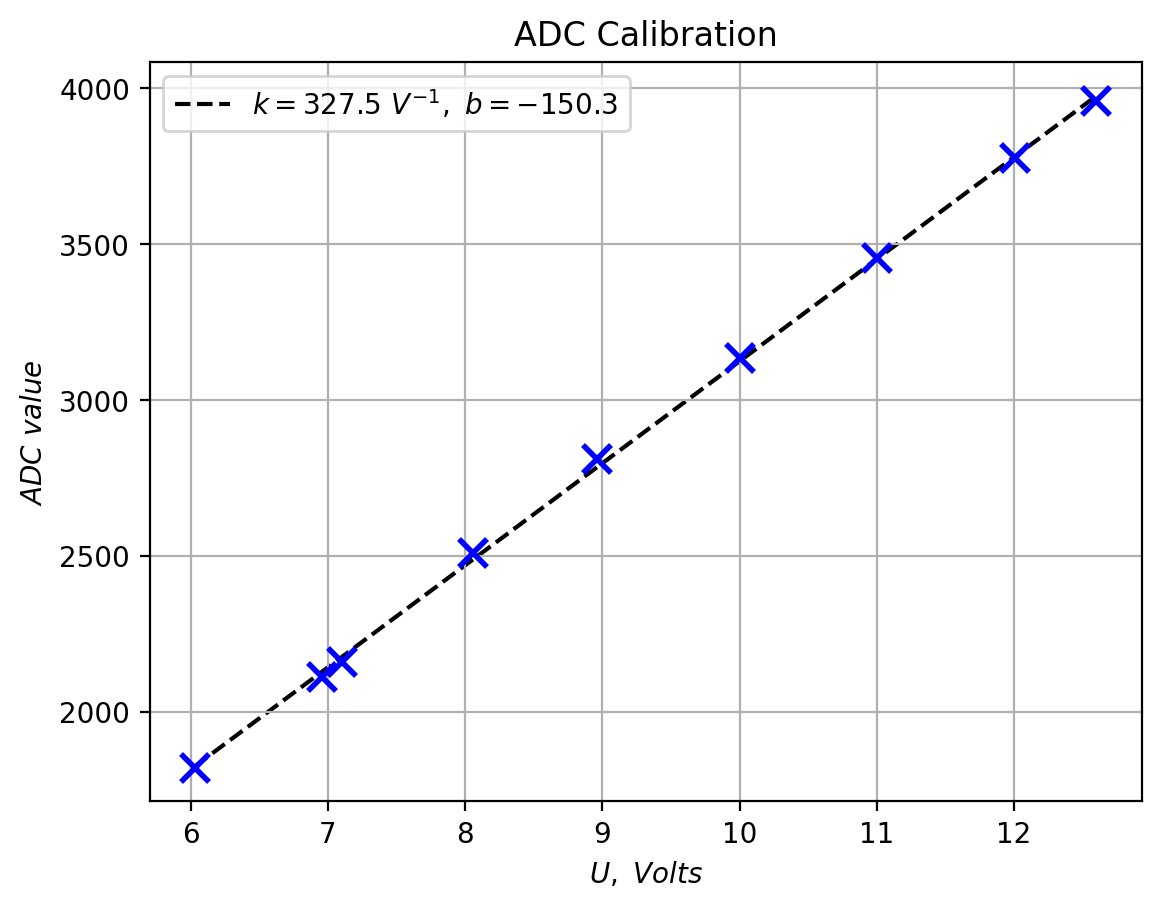

In [22]:
import matplotlib.pyplot as plt
import numpy as np

volts = []
values = []

with open("ADCCalib.csv") as f:
  for line in f.readlines()[1:]:
    volt, value = map(float, line.split(","))
    volts.append(volt)
    values.append(value)

volts = np.array(volts)
values = np.array(values)

p = np.polyfit(volts, values, 1)
print(p)

k, b = np.round(p[0], 1), np.round(p[1], 1)

plt.figure(dpi=200)
plt.plot(volts, values, "bx", ms=10, mew=2)
plt.plot(volts, np.polyval(p, volts), "k--", zorder=0, label=f"$k={k} ~V^{'{-1}'},~ b={b}$")

plt.grid()

plt.xlabel("$U, ~Volts$")
plt.ylabel("$ADC~value$")
plt.title("ADC Calibration")
plt.legend()
plt.show()